In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

col_list = ["TV", "radio","newspaper","sales"]
data = pd.read_csv("Advertising.csv", usecols=col_list)

In [2]:
data["sales"]     #y-axis

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [3]:
data["radio"]     #x-axis

0      37.8
1      39.3
2      45.9
3      41.3
4      10.8
       ... 
195     3.7
196     4.9
197     9.3
198    42.0
199     8.6
Name: radio, Length: 200, dtype: float64

In [4]:
x_mean=np.mean(data["radio"])
print(x_mean)
y_mean=np.mean(data["sales"])
print(y_mean)
n=data["sales"].size
print(n)

23.264000000000024
14.022500000000003
200


In [5]:
ss_xy=np.sum(data["radio"]*data["sales"]) - n*x_mean*y_mean
print(ss_xy)
ss_xx=np.sum(data["radio"]*data["radio"]) - n*x_mean*x_mean
print(ss_xx)
b1=ss_xy/ss_xx
print(b1)
b0=y_mean-b1*x_mean
print(b0)

8882.50199999992
43865.12079999976
0.20249578339243898
9.311638095158298


0      16.965979
1      17.269722
2      18.606195
3      17.674714
4      11.498593
         ...    
195    10.060872
196    10.303867
197    11.194849
198    17.816461
199    11.053102
Name: radio, Length: 200, dtype: float64


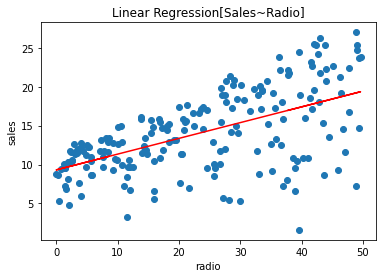

In [6]:
plt.scatter(data["radio"],data["sales"])
y_pred=b0+b1*data["radio"]
print(y_pred)
plt.plot(data["radio"],y_pred,color='red')
plt.xlabel("radio")
plt.ylabel("sales")
plt.title("Linear Regression[Sales~Radio]")
plt.show()

In [7]:
e=data["sales"]-y_pred
e

0      5.134021
1     -6.869722
2     -9.306195
3      0.825286
4      1.401407
         ...   
195   -2.460872
196   -0.603867
197    1.605151
198    7.683539
199    2.346898
Length: 200, dtype: float64

In [8]:
RSS=np.sum(e**2)
RSS

3618.4795490250876

In [9]:
MSE=RSS/n
MSE

18.09239774512544

In [10]:
SST=np.sum((data["sales"]-y_mean)**2)
SST

5417.14875

In [11]:
R2=1-(RSS/SST)
R2

0.33203245544529536

# Regress sales~Radio, TV, Newspaper from adverstising.csv

In [12]:
import pandas as pd
import numpy as np
import statistics
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
ds=pd.read_csv("Advertising.csv")

In [13]:
x1=ds.TV.values
#print(x1.shape)
x1=x1.reshape(200,1)
#print(x1.shape)
x2=ds.radio.values
x2=x2.reshape(200,1)
x3=ds.newspaper.values
x3=x3.reshape(200,1)
x0=np.ones([200,1])

In [14]:
X=np.column_stack((x0,x1,x2,x3))
print(X)
y=ds.sales.values
Y=y.reshape(200,1)

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]
 [  1.    8.7  48.9  75. ]
 [  1.   57.5  32.8  23.5]
 [  1.  120.2  19.6  11.6]
 [  1.    8.6   2.1   1. ]
 [  1.  199.8   2.6  21.2]
 [  1.   66.1   5.8  24.2]
 [  1.  214.7  24.    4. ]
 [  1.   23.8  35.1  65.9]
 [  1.   97.5   7.6   7.2]
 [  1.  204.1  32.9  46. ]
 [  1.  195.4  47.7  52.9]
 [  1.   67.8  36.6 114. ]
 [  1.  281.4  39.6  55.8]
 [  1.   69.2  20.5  18.3]
 [  1.  147.3  23.9  19.1]
 [  1.  218.4  27.7  53.4]
 [  1.  237.4   5.1  23.5]
 [  1.   13.2  15.9  49.6]
 [  1.  228.3  16.9  26.2]
 [  1.   62.3  12.6  18.3]
 [  1.  262.9   3.5  19.5]
 [  1.  142.9  29.3  12.6]
 [  1.  240.1  16.7  22.9]
 [  1.  248.8  27.1  22.9]
 [  1.   70.6  16.   40.8]
 [  1.  292.9  28.3  43.2]
 [  1.  112.9  17.4  38.6]
 [  1.   97.2   1.5  30. ]
 [  1.  265.6  20.    0.3]
 [  1.   95.7   1.4   7.4]
 [  1.  290.7   4.1   8.5]
 [  1.  266.9  43.8   5. ]
 

In [15]:
Xt=np.transpose(X)
print(Xt.shape)
XtX=np.matmul(Xt,X)
print(XtX.shape)
XtX_inv=np.linalg.inv(XtX)
print(XtX_inv.shape)
prod=np.matmul(XtX_inv,Xt)

(4, 200)
(4, 4)
(4, 4)


In [16]:
theta=np.matmul(prod,Y)
theta

array([[ 2.93888937e+00],
       [ 4.57646455e-02],
       [ 1.88530017e-01],
       [-1.03749304e-03]])

In [17]:
y_pred=np.matmul(X,theta)

e=Y-y_pred
e.shape

(200, 1)

In [18]:
e2=e**2
e2

array([[2.48385666e+00],
       [3.75528131e+00],
       [9.04608352e+00],
       [8.13911590e-01],
       [8.33314409e-02],
       [2.78609537e+01],
       [4.93366440e-03],
       [1.16002988e+00],
       [1.15059762e+00],
       [3.80581074e+00],
       [2.45768580e+00],
       [1.31953047e-02],
       [1.89646151e+00],
       [7.63350851e-01],
       [3.19941388e-01],
       [2.49861402e+00],
       [1.04753688e-01],
       [1.38072568e+00],
       [1.81796127e+00],
       [1.88292700e-01],
       [1.01540441e-02],
       [5.02001143e+00],
       [7.90588262e-01],
       [1.09397562e+00],
       [2.41330362e+00],
       [1.30323787e+01],
       [1.09950148e-04],
       [1.32635170e+00],
       [2.60649077e-01],
       [1.83867120e+00],
       [5.47250240e-02],
       [3.06813071e-01],
       [3.84597933e+00],
       [2.14408163e+00],
       [3.70627755e+00],
       [1.76973865e+01],
       [3.97643275e+00],
       [8.52811226e-01],
       [3.66029466e-02],
       [1.10752388e+00],


In [19]:
RSS=np.sum(e2)
RSS

556.8252629021872

In [20]:
MSE=np.mean(e2)
MSE

2.784126314510936

In [21]:
y_mean=np.mean(Y)
y_mean

14.0225

In [22]:
Y-y_mean

array([[  8.0775],
       [ -3.6225],
       [ -4.7225],
       [  4.4775],
       [ -1.1225],
       [ -6.8225],
       [ -2.2225],
       [ -0.8225],
       [ -9.2225],
       [ -3.4225],
       [ -5.4225],
       [  3.3775],
       [ -4.8225],
       [ -4.3225],
       [  4.9775],
       [  8.3775],
       [ -1.5225],
       [ 10.3775],
       [ -2.7225],
       [  0.5775],
       [  3.9775],
       [ -1.5225],
       [ -8.4225],
       [  1.4775],
       [ -4.3225],
       [ -2.0225],
       [  0.9775],
       [  1.8775],
       [  4.8775],
       [ -3.5225],
       [  7.3775],
       [ -2.1225],
       [ -4.4225],
       [  3.3775],
       [ -4.5225],
       [ -1.2225],
       [ 11.3775],
       [  0.6775],
       [ -3.9225],
       [  7.4775],
       [  2.5775],
       [  3.0775],
       [  6.6775],
       [ -1.1225],
       [ -5.5225],
       [  0.8775],
       [ -3.4225],
       [  9.1775],
       [  0.7775],
       [ -4.3225],
       [ -2.6225],
       [ -3.3225],
       [  8.

In [23]:
SST=np.sum((Y-y_mean)**2)
SST

5417.14875

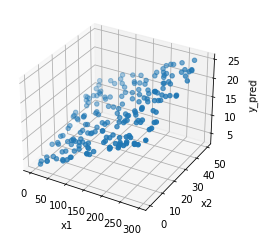

In [24]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, y_pred);
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y_pred');

In [25]:
a = np.column_stack((x0,x1))
b = np.column_stack((x0,x2))
c = np.column_stack((x0,y))

[Text(0.5, 0, 'x1'), Text(0.5, 0, 'x2'), Text(0.5, 0, 'y')]

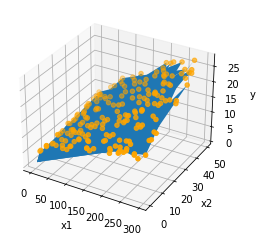

In [26]:
fig = plt.figure(num=1, clear=True)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(a, b, c)
ax.scatter3D(x1, x2, Y,color='orange');
ax.set(xlabel='x1', ylabel='x2', zlabel='y')

In [27]:
R2=1-(RSS/SST)
R2

0.8972106381789522